In [27]:
import pandas as pd
import numpy as np
import seaborn as sn
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv('../MDAC2/total16and17.csv')
df.head()

,Unnamed: 0,Checks2,Covers2,Gross Revenue2,Profit Center,Day_Open,Month,Year
0,0,2085,0,7455.62,Profit Center Annenberg Cart(305),11,Jan,2016
1,1,14554,0,59371.08,Profit Center CC CBTL(281),27,Jan,2016
2,2,11625,0,52161.07,Profit Center Coffee Bean & Tea Leaf(275),16,Jan,2016
3,3,8969,0,75420.01,Profit Center CPK(286),22,Jan,2016
4,4,415,1181,23116.88,Profit Center Edmondson Faculty Center(296),19,Jan,2016


## CustomerCounts
If covers2 is greater than checks2, then CustomerCounts = Covers2;
Else CustomerCounts = Checks2

Here, I use np.where to replace for loops with if-else statement.

In [29]:
df['CustomerCounts'] = np.where((df.Covers2 > df.Checks2), df.Covers2, df.Checks2)
df.head()

,Unnamed: 0,Checks2,Covers2,Gross Revenue2,Profit Center,Day_Open,Month,Year,CustomerCounts
0,0,2085,0,7455.62,Profit Center Annenberg Cart(305),11,Jan,2016,2085
1,1,14554,0,59371.08,Profit Center CC CBTL(281),27,Jan,2016,14554
2,2,11625,0,52161.07,Profit Center Coffee Bean & Tea Leaf(275),16,Jan,2016,11625
3,3,8969,0,75420.01,Profit Center CPK(286),22,Jan,2016,8969
4,4,415,1181,23116.88,Profit Center Edmondson Faculty Center(296),19,Jan,2016,1181


## Rename Column Name - Revenue

In [30]:
df.rename(columns = {'Gross Revenue2':'Revenue'},inplace=True)

## Create a new feature - Semester
Spring Semester: Jan, Feb, Mar, Apr

Summer Semester: May, Jun, July

Fall Semester: Aug, Sep, Oct, Nov

Winter Semester: Dec

Method 1: use np.select(conditionlist, choicelist, default) to replace for loop.

In [31]:
# isin 
conditionlist = [df.Month.isin(['Jan','Feb','Mar','Apr']),
                 df.Month.isin(['May','Jun','July']),
                 df.Month == 'Dec']
choicelist = ['Spring','Summer','Winter']
df['Semester1'] = np.select(conditionlist, choicelist, default='Fall')

Method 2: Use for loop 

In [32]:
def set_semester(df):
    if df['Month'] in ['Jan','Feb','Mar','Apr']:
        return 'Spring'
    elif df['Month'] in ['May','Jun','July']:
        return 'Summer'
    elif df['Month'] == 'Dec':
        return 'Winter'
    else:
        return 'Fall'
df['Semester2'] = df.apply(set_semester, axis=1)

In [33]:
df.head()

,Unnamed: 0,Checks2,Covers2,Revenue,Profit Center,Day_Open,Month,Year,CustomerCounts,Semester1,Semester2
0,0,2085,0,7455.62,Profit Center Annenberg Cart(305),11,Jan,2016,2085,Spring,Spring
1,1,14554,0,59371.08,Profit Center CC CBTL(281),27,Jan,2016,14554,Spring,Spring
2,2,11625,0,52161.07,Profit Center Coffee Bean & Tea Leaf(275),16,Jan,2016,11625,Spring,Spring
3,3,8969,0,75420.01,Profit Center CPK(286),22,Jan,2016,8969,Spring,Spring
4,4,415,1181,23116.88,Profit Center Edmondson Faculty Center(296),19,Jan,2016,1181,Spring,Spring


## Drop columns

In [34]:
df.columns

Index(['Unnamed: 0', 'Checks2', 'Covers2', 'Revenue', 'Profit Center',
       'Day_Open', 'Month', 'Year', 'CustomerCounts', 'Semester1',
       'Semester2'],
      dtype='object')

In [35]:
cols_to_drop = ['Unnamed: 0', 'Checks2', 'Covers2', 'Semester1']
df.drop(cols_to_drop, axis=1, inplace=True)
# rename semester2 col
df.rename(columns = {'Semester2':'Semester'},inplace=True)
df.head()

,Revenue,Profit Center,Day_Open,Month,Year,CustomerCounts,Semester
0,7455.62,Profit Center Annenberg Cart(305),11,Jan,2016,2085,Spring
1,59371.08,Profit Center CC CBTL(281),27,Jan,2016,14554,Spring
2,52161.07,Profit Center Coffee Bean & Tea Leaf(275),16,Jan,2016,11625,Spring
3,75420.01,Profit Center CPK(286),22,Jan,2016,8969,Spring
4,23116.88,Profit Center Edmondson Faculty Center(296),19,Jan,2016,1181,Spring


My partner created Region and Dollar_Person columns.

In [36]:
df2 = pd.read_csv('../MDAC2/data_Zikun.csv')
df2.head()

,Index,Revenue,Profit Center,Day_Open,Month,Year,CustomerCounts,Semester,Region,Dollar_Person
0,0,7455.62,Profit Center Annenberg Cart(305),11,Jan,2016,2085,Spring,Retail West,3.64
1,1,59371.08,Profit Center CC CBTL(281),27,Jan,2016,14554,Spring,RTCC,4.36
2,2,52161.07,Profit Center Coffee Bean & Tea Leaf(275),16,Jan,2016,11625,Spring,Retail West,4.80
3,3,75420.01,Profit Center CPK(286),22,Jan,2016,8969,Spring,RTCC,8.74
4,4,23116.88,Profit Center Edmondson Faculty Center(296),19,Jan,2016,1181,Spring,Restaurant,18.04


In [37]:
df2.drop('Index',axis=1, inplace=True)

## Missing Value

In [38]:
df2.isnull().sum()

Revenue            0
Profit Center      0
Day_Open           0
Month              0
Year               0
CustomerCounts     0
Semester           0
Region            35
Dollar_Person      0
dtype: int64

In [39]:
df2.fillna(value = 'Others', inplace=True)

In [40]:
df2.Region.isnull().sum()

0

## Analysis of Region

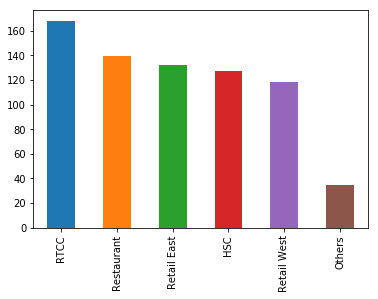

In [41]:
df2.Region.value_counts().plot(kind='bar')

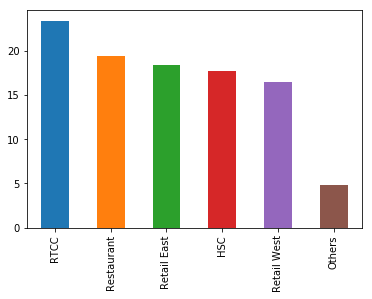

In [42]:
(df2.Region.value_counts(normalize = True)*100).plot(kind='bar')

In [43]:
df2.Revenue.mean()

79704.190625869262

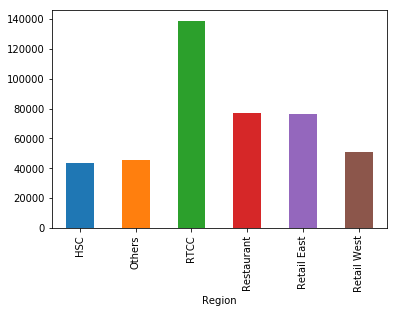

In [44]:
df2.groupby('Region').Revenue.mean().plot(kind='bar')

In [45]:
df2.groupby('Region').Revenue.agg(['count','min','max','mean'])

,count,min,max,mean
Region,,,,
HSC,127,0.03,76378.43,43410.264961
Others,35,0.00,111624.10,45799.052857
RTCC,168,23730.04,617844.97,138925.933095
Restaurant,139,110.08,255682.92,77159.340360
Retail East,132,0.01,312495.77,76624.431364
Retail West,118,443.95,136281.05,50950.106356


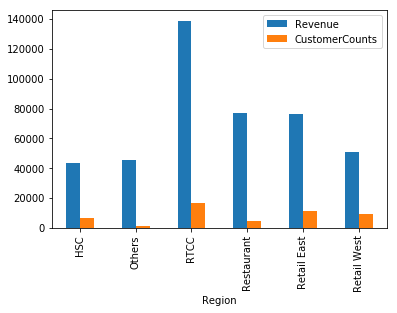

In [46]:
df2.groupby('Region')['Revenue','CustomerCounts'].mean().plot(kind='bar')

In [47]:
df3 = df2.groupby(['Region','Year']).Revenue.agg(['sum','mean'])
df3

sum           mean
Region      Year                            
HSC         2016   2726763.85   45446.064167
            2017   2786339.80   41587.161194
Others      2016    549298.45   39235.603571
            2017   1053668.40   50174.685714
RTCC        2016  12052856.78  143486.390238
            2017  11286699.98  134365.475952
Restaurant  2016   5037083.77   75180.354776
            2017   5688064.54   79000.896389
Retail East 2016   4376251.54   75452.612759
            2017   5738173.40   77542.883784
Retail West 2016   2920344.82   50350.772759
            2017   3091767.73   51529.462167

In [48]:
df3.index

MultiIndex(levels=[['HSC', 'Others', 'RTCC', 'Restaurant', 'Retail East', 'Retail West'], [2016, 2017]],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['Region', 'Year'])

In [49]:
df3.reset_index(inplace=True)
df3

,Region,Year,sum,mean
0,HSC,2016,2726763.85,45446.064167
1,HSC,2017,2786339.80,41587.161194
2,Others,2016,549298.45,39235.603571
3,Others,2017,1053668.40,50174.685714
4,RTCC,2016,12052856.78,143486.390238
5,RTCC,2017,11286699.98,134365.475952
6,Restaurant,2016,5037083.77,75180.354776
7,Restaurant,2017,5688064.54,79000.896389
8,Retail East,2016,4376251.54,75452.612759
9,Retail East,2017,5738173.40,77542.883784


In [51]:
df3.loc[df3.Year == 2016,:]

,Region,Year,sum,mean
0,HSC,2016,2726763.85,45446.064167
2,Others,2016,549298.45,39235.603571
4,RTCC,2016,12052856.78,143486.390238
6,Restaurant,2016,5037083.77,75180.354776
8,Retail East,2016,4376251.54,75452.612759
10,Retail West,2016,2920344.82,50350.772759


In [52]:
df = df2
df.head()

,Revenue,Profit Center,Day_Open,Month,Year,CustomerCounts,Semester,Region,Dollar_Person
0,7455.62,Profit Center Annenberg Cart(305),11,Jan,2016,2085,Spring,Retail West,3.64
1,59371.08,Profit Center CC CBTL(281),27,Jan,2016,14554,Spring,RTCC,4.36
2,52161.07,Profit Center Coffee Bean & Tea Leaf(275),16,Jan,2016,11625,Spring,Retail West,4.80
3,75420.01,Profit Center CPK(286),22,Jan,2016,8969,Spring,RTCC,8.74
4,23116.88,Profit Center Edmondson Faculty Center(296),19,Jan,2016,1181,Spring,Restaurant,18.04


In [53]:
df.dtypes

Revenue           float64
Profit Center      object
Day_Open            int64
Month              object
Year                int64
CustomerCounts      int64
Semester           object
Region             object
Dollar_Person     float64
dtype: object

## Change object to category

In [54]:
tran_cols = df.select_dtypes(include = 'object').columns
tran_cols

Index(['Profit Center', 'Month', 'Semester', 'Region'], dtype='object')

In [55]:
df[tran_cols] = df[tran_cols].apply(lambda x: x.astype('category'))
df['Year'] = df['Year'].astype('category')

In [58]:
df.dtypes

Revenue            float64
Profit Center     category
Day_Open             int64
Month             category
Year              category
CustomerCounts       int64
Semester          category
Region            category
Dollar_Person      float64
dtype: object

In [60]:
df.head()

,Revenue,Profit Center,Day_Open,Month,Year,CustomerCounts,Semester,Region,Dollar_Person
0,7455.62,Profit Center Annenberg Cart(305),11,Jan,2016,2085,Spring,Retail West,3.64
1,59371.08,Profit Center CC CBTL(281),27,Jan,2016,14554,Spring,RTCC,4.36
2,52161.07,Profit Center Coffee Bean & Tea Leaf(275),16,Jan,2016,11625,Spring,Retail West,4.80
3,75420.01,Profit Center CPK(286),22,Jan,2016,8969,Spring,RTCC,8.74
4,23116.88,Profit Center Edmondson Faculty Center(296),19,Jan,2016,1181,Spring,Restaurant,18.04


In [61]:
df.to_csv('data.csv')